# Communicate Data Findings Project - US Flights on 2018 

## Table of Contents

<ul>
<li><a href="#Intro"><b>Introduction</b></a></li>
<li><a href="#Wrangle"><b>Wrangle Data</b></a></li>
<li><a href="#Analyze"><b>Analyze and Visualize Data - Exploration:</b></a></li>
<ul><li><a href="#Univariate">Univariate Exploration</a></li>
<li><a href="#Bivariate">Bivariate Exploration</a></li>
<li><a href="#Multivariate">Multivariate Exploration</a></li>
</ul>
</ul>

<a id='Intro'></a>
## Introduction

In this Project I'll Perform Analyzing, Wrangling,and Visualizing our Dataset & communicates a clear and compelling story, which is US Flights on 2018, from [Kaggel](https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018) that contain data of 2018 Flights Like Date of Flights, Origin , Destination, Cancellation situation & reasons, also delay cases, 

<a id='Gather'></a>
## Gather Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read Flights on 2018 Data

In [2]:
# Read 2018.csv flights on 2018 file
df = pd.read_csv('2018.csv')
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


<a id='Wrangle'></a>
## Wrangle Data

#### I need to do some wrangling on dataset like: remove unneeded columns, change date columns type, do some merge ..etc

In [3]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


#### check Missing Values and Data Types of Data set 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

#### check null values and duplicates

In [5]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

In [6]:
#set FL_DATE type to date
df['FL_DATE']= df['FL_DATE'].astype('datetime64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [8]:
sum(df.duplicated())

0

In [9]:
df['OP_CARRIER'].value_counts()

WN    1352552
DL     949283
AA     916818
OO     774137
UA     621565
YX     316090
B6     305010
MQ     296001
OH     278457
9E     245917
AS     245761
YV     215138
EV     202890
NK     176178
F9     120035
G4      96221
HA      83723
VX      17670
Name: OP_CARRIER, dtype: int64

In [10]:
df['ORIGIN'].value_counts()

ATL    390046
ORD    332953
DFW    279298
DEN    235989
CLT    233317
        ...  
AKN        63
CYS        58
IFP        45
ART        25
YNG         2
Name: ORIGIN, Length: 358, dtype: int64

In [11]:
df['DEST'].value_counts()

ATL    390079
ORD    332942
DFW    279272
DEN    236020
CLT    233309
        ...  
AKN        63
CYS        58
IFP        45
ART        26
YNG         2
Name: DEST, Length: 358, dtype: int64

#### Merge Airlines Name into our data sets

In [12]:
# Read airlines.csv file
airlines_df = pd.read_csv('airlines.csv')
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [13]:
#join airlines with df datasets using merge
df_1= df.copy()
df_1= pd.merge(df_1, airlines_df, left_on='OP_CARRIER', right_on='IATA_CODE', how='inner')
df_1

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,IATA_CODE,AIRLINE
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6061618,2018-12-31,DL,1725,ATL,SRQ,1025,1030.0,5.0,25.0,1055.0,...,66.0,444.0,NaN,NaN,NaN,NaN,NaN,NaN,DL,Delta Air Lines Inc.
6061619,2018-12-31,DL,1725,SRQ,ATL,1240,1243.0,3.0,11.0,1254.0,...,74.0,444.0,NaN,NaN,NaN,NaN,NaN,NaN,DL,Delta Air Lines Inc.
6061620,2018-12-31,DL,1726,ATL,FLL,1405,1427.0,22.0,13.0,1440.0,...,84.0,581.0,NaN,NaN,NaN,NaN,NaN,NaN,DL,Delta Air Lines Inc.
6061621,2018-12-31,DL,1726,FLL,ATL,1655,1655.0,0.0,17.0,1712.0,...,77.0,581.0,NaN,NaN,NaN,NaN,NaN,NaN,DL,Delta Air Lines Inc.


#### Merge airports States into our data sets (origin, Destination)

In [14]:
# Read airports.csv file
airports_df = pd.read_csv('airports.csv')
Origin_airports_df=airports_df.copy()
Origin_airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [15]:
# rename Columns name to merge it with dataset
Origin_airports_df=Origin_airports_df.rename(columns={"CITY": "ORIGIN_CITY", "STATE": "ORIGIN_STATE"})
Origin_airports_df.head()

,IATA_CODE,AIRPORT,ORIGIN_CITY,ORIGIN_STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [16]:
#join airports city, state with df datasets using merge
df_1= pd.merge(df_1, Origin_airports_df[['IATA_CODE','ORIGIN_CITY','ORIGIN_STATE']], left_on='ORIGIN', right_on='IATA_CODE', how='inner')
df_1

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,IATA_CODE_x,AIRLINE,IATA_CODE_y,ORIGIN_CITY,ORIGIN_STATE
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.,EWR,Newark,NJ
1,2018-01-01,UA,2415,EWR,PDX,825,822.0,-3.0,15.0,837.0,...,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.,EWR,Newark,NJ
2,2018-01-01,UA,2414,EWR,ATL,1044,1055.0,11.0,11.0,1106.0,...,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.,EWR,Newark,NJ
3,2018-01-01,UA,2411,EWR,SMF,1810,1922.0,72.0,16.0,1938.0,...,0.0,0.0,0.0,18.0,NaN,UA,United Air Lines Inc.,EWR,Newark,NJ
4,2018-01-01,UA,2406,EWR,TYS,830,844.0,14.0,20.0,904.0,...,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.,EWR,Newark,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052494,2018-12-30,OO,3729,BQK,ATL,610,606.0,-4.0,24.0,630.0,...,NaN,NaN,NaN,NaN,NaN,OO,Skywest Airlines Inc.,BQK,Brunswick,GA
6052495,2018-12-30,OO,4143,BQK,ATL,1143,1154.0,11.0,6.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,OO,Skywest Airlines Inc.,BQK,Brunswick,GA
6052496,2018-12-30,OO,4147,BQK,ATL,1657,1802.0,65.0,37.0,1839.0,...,0.0,16.0,0.0,65.0,NaN,OO,Skywest Airlines Inc.,BQK,Brunswick,GA
6052497,2018-12-31,OO,3751,BQK,ATL,610,1446.0,516.0,15.0,1501.0,...,0.0,0.0,0.0,0.0,NaN,OO,Skywest Airlines Inc.,BQK,Brunswick,GA


In [17]:
# Read airports.csv file
Dest_airports_df=airports_df.copy()
Dest_airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [18]:
# rename Columns name to merge it with dataset
Dest_airports_df=Dest_airports_df.rename(columns={"CITY": "DEST_CITY", "STATE": "DEST_STATE"})
Dest_airports_df.head()

,IATA_CODE,AIRPORT,DEST_CITY,DEST_STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [19]:
#join airports city, state with df datasets using 
df_1= pd.merge(df_1, Dest_airports_df[['IATA_CODE','DEST_CITY','DEST_STATE']], left_on='DEST', right_on='IATA_CODE', how='inner')
df_1

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,LATE_AIRCRAFT_DELAY,Unnamed: 27,IATA_CODE_x,AIRLINE,IATA_CODE_y,ORIGIN_CITY,ORIGIN_STATE,IATA_CODE,DEST_CITY,DEST_STATE
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,NaN,NaN,UA,United Air Lines Inc.,EWR,Newark,NJ,DEN,Denver,CO
1,2018-01-01,UA,2041,EWR,DEN,1657,1938.0,161.0,14.0,1952.0,...,116.0,NaN,UA,United Air Lines Inc.,EWR,Newark,NJ,DEN,Denver,CO
2,2018-01-01,UA,1819,EWR,DEN,600,559.0,-1.0,14.0,613.0,...,NaN,NaN,UA,United Air Lines Inc.,EWR,Newark,NJ,DEN,Denver,CO
3,2018-01-01,UA,1740,EWR,DEN,1855,1906.0,11.0,26.0,1932.0,...,NaN,NaN,UA,United Air Lines Inc.,EWR,Newark,NJ,DEN,Denver,CO
4,2018-01-01,UA,1262,EWR,DEN,1150,1149.0,-1.0,13.0,1202.0,...,NaN,NaN,UA,United Air Lines Inc.,EWR,Newark,NJ,DEN,Denver,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044341,2018-12-29,OO,5104,JMS,DVL,2315,2258.0,-17.0,20.0,2318.0,...,NaN,NaN,OO,Skywest Airlines Inc.,JMS,Jamestown,ND,DVL,Devils Lake,ND
6044342,2018-12-30,OO,5102,JMS,DVL,1310,1252.0,-18.0,14.0,1306.0,...,NaN,NaN,OO,Skywest Airlines Inc.,JMS,Jamestown,ND,DVL,Devils Lake,ND
6044343,2018-12-30,OO,5104,JMS,DVL,2315,2259.0,-16.0,44.0,2343.0,...,NaN,NaN,OO,Skywest Airlines Inc.,JMS,Jamestown,ND,DVL,Devils Lake,ND
6044344,2018-12-31,OO,5102,JMS,DVL,1309,NaN,NaN,NaN,NaN,...,NaN,NaN,OO,Skywest Airlines Inc.,JMS,Jamestown,ND,DVL,Devils Lake,ND


In [20]:
df_1['CANCELLED'].value_counts()

0.0    5962801
1.0      81545
Name: CANCELLED, dtype: int64

In [21]:
df_1['CANCELLATION_CODE'].value_counts()

B    44937
A    19797
C    16783
D       28
Name: CANCELLATION_CODE, dtype: int64

In [22]:
#change FL_DATE Type
df_1['CANCELLED']= df_1['CANCELLED'].astype(object)

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6044346 entries, 0 to 6044345
Data columns (total 36 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            object        
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [24]:
df_1['CANCELLED'].value_counts()

0.0    5962801
1.0      81545
Name: CANCELLED, dtype: int64

In [25]:
df_1['CANCELLATION_CODE'].value_counts()

B    44937
A    19797
C    16783
D       28
Name: CANCELLATION_CODE, dtype: int64

#### Merge Cancellation Reasons with datast

In [26]:
Cancellation_data = [['A', 'Carrier'], ['B', 'Weather'], ['C', 'NAS'],['D', 'Security']] 
  
# Create the pandas Cancellation code df 
Cancellation_df = pd.DataFrame(Cancellation_data, columns = ['CODE', 'CANCELLATION_REASON']) 
Cancellation_df

,CODE,CANCELLATION_REASON
0,A,Carrier
1,B,Weather
2,C,NAS
3,D,Security


In [27]:
#join airports cancellation code with df datasets using 
df_1= pd.merge(df_1, Cancellation_df, left_on='CANCELLATION_CODE', right_on='CODE', how='left')
df_1.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,IATA_CODE_x,AIRLINE,IATA_CODE_y,ORIGIN_CITY,ORIGIN_STATE,IATA_CODE,DEST_CITY,DEST_STATE,CODE,CANCELLATION_REASON
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,UA,United Air Lines Inc.,EWR,Newark,NJ,DEN,Denver,CO,NaN,NaN
1,2018-01-01,UA,2041,EWR,DEN,1657,1938.0,161.0,14.0,1952.0,...,UA,United Air Lines Inc.,EWR,Newark,NJ,DEN,Denver,CO,NaN,NaN
2,2018-01-01,UA,1819,EWR,DEN,600,559.0,-1.0,14.0,613.0,...,UA,United Air Lines Inc.,EWR,Newark,NJ,DEN,Denver,CO,NaN,NaN
3,2018-01-01,UA,1740,EWR,DEN,1855,1906.0,11.0,26.0,1932.0,...,UA,United Air Lines Inc.,EWR,Newark,NJ,DEN,Denver,CO,NaN,NaN
4,2018-01-01,UA,1262,EWR,DEN,1150,1149.0,-1.0,13.0,1202.0,...,UA,United Air Lines Inc.,EWR,Newark,NJ,DEN,Denver,CO,NaN,NaN


In [28]:
df_1['CANCELLATION_REASON'].value_counts()

Weather     44937
Carrier     19797
NAS         16783
Security       28
Name: CANCELLATION_REASON, dtype: int64

#### remove unnecessary Columns

In [29]:
df_1.drop(df_1[['Unnamed: 27','IATA_CODE_x','IATA_CODE_y','IATA_CODE','CODE']],axis=1,inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6044346 entries, 0 to 6044345
Data columns (total 33 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            object        
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

<a id='Univariate'></a>
### What is the structure of your dataset?

There are 6,044,346 flights Recordes on 2018 in the dataset with 31 features (Flight Date, Airline, Origin, Destination, cancelled, cancelled Reason, Departure Delay, Arraival Delay time in minutes, Dealy Reasons). Most variables are numeric in nature, but the variables Airline, Origin State,Destination State,Cancellation Reason and clarity are Descriptive.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in exploring flights distributions among monthse & cancelled flights & delayed flight also reason of cancellations and delaying and thier impacts.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that flights airlines, months, Origin & Destinations states will support our investigation into the feature(s) of interest also will effect on cancellations or delay.

## Univariate Exploration

I'll start by looking generally at the distribution of the Airlines, and origin and Destination states, then we will focus on Cancelled Airlines

### 1. Distribuation of Airlines

In [30]:
airlines_distribution = df_1['AIRLINE'].value_counts()
airlines_distribution

Southwest Airlines Co.          1352552
Delta Air Lines Inc.             949283
American Airlines Inc.           916818
Skywest Airlines Inc.            759913
United Air Lines Inc.            621051
JetBlue Airways                  305010
American Eagle Airlines Inc.     293626
Alaska Airlines Inc.             245761
Atlantic Southeast Airlines      202890
Spirit Air Lines                 176178
Frontier Airlines Inc.           119871
Hawaiian Airlines Inc.            83723
Virgin America                    17670
Name: AIRLINE, dtype: int64

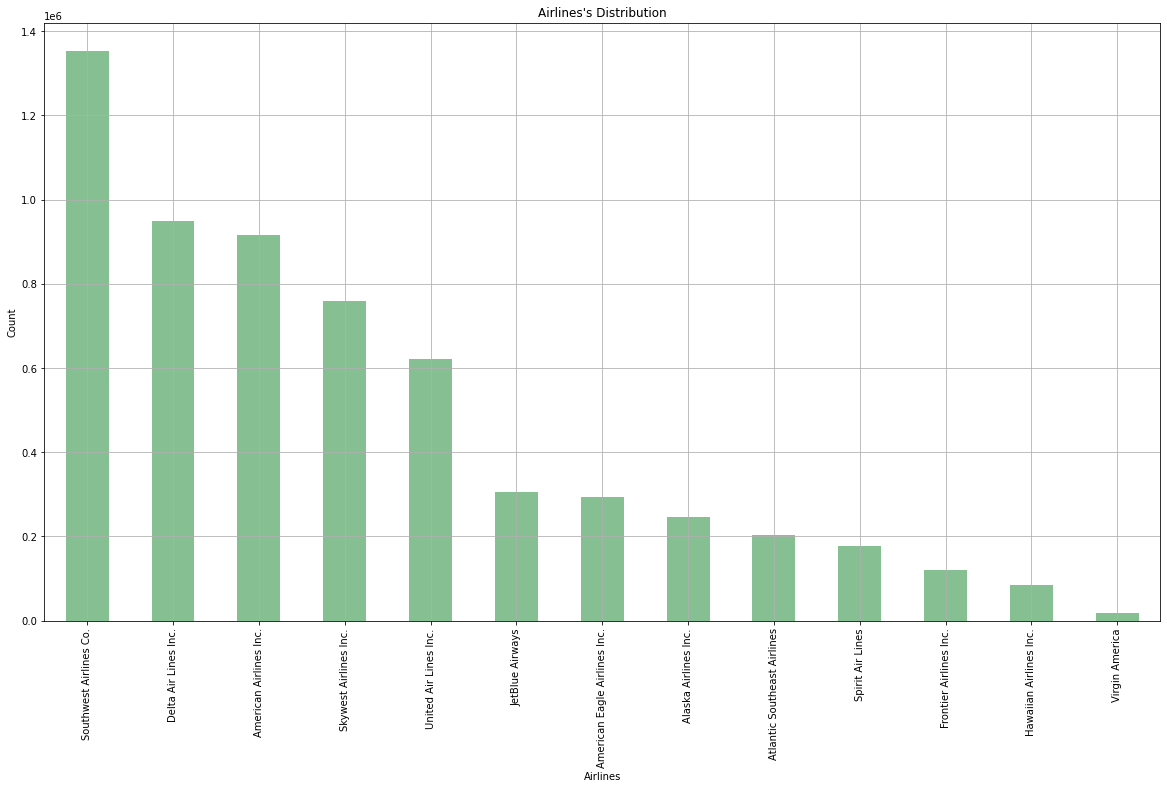

In [31]:
#Draw plot for airlines distribution

airlines_Plt=airlines_distribution.plot(kind='bar',title='Airlines\'s Distribution',grid=True,color='#86bf91',figsize=(20,11));
airlines_Plt.set_xlabel("Airlines");
airlines_Plt.set_ylabel("Count");

We can notice that Southwest Airlines Co have highst number of Airlines on 2018 then Delta Air Lines In, American Airlines Inc,Skywest Airlines Inc airlines Respectively, and the least Airline is Virgin America with 17670 flights records.

### 2. Distribuation of Origin State

In [32]:
Origin_State_distribution = df_1['ORIGIN_STATE'].value_counts()
Origin_State_distribution

CA    777115
TX    637284
FL    494142
IL    408693
GA    364574
NY    270122
CO    255483
NC    181046
AZ    170722
NV    169837
MI    159864
WA    155596
VA    150146
MN    149263
MA    138445
PA    127090
NJ    122605
UT    116775
MO    115948
HI    110114
MD    103542
TN     94841
OH     81916
OR     75134
LA     72074
WI     50311
IN     44378
KY     42757
AK     38850
SC     34220
OK     33989
PR     27145
AL     24433
CT     24247
ID     24056
NM     23886
NE     22393
AR     21547
IA     19090
MT     19023
RI     14741
ND     14651
KS     11704
MS      9414
SD      8615
ME      8480
WY      8150
NH      6041
VT      4170
VI      3658
WV      1538
GU       366
AS       122
Name: ORIGIN_STATE, dtype: int64

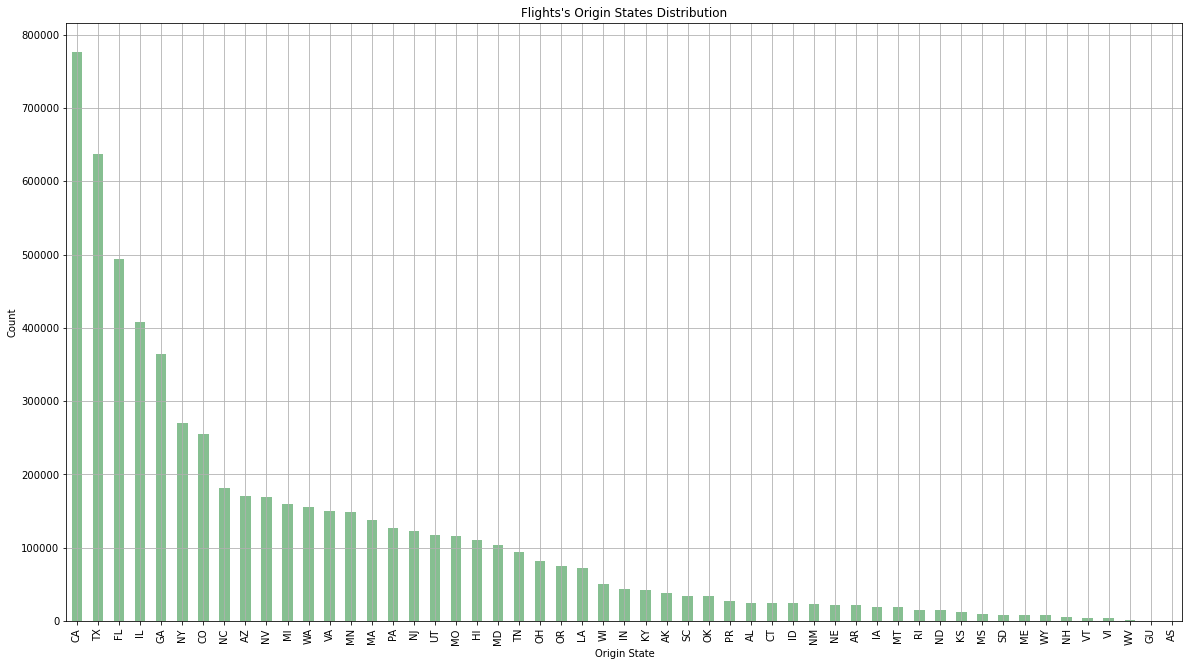

In [33]:
#Draw plot for airlines distribution

Origin_State_Plt=Origin_State_distribution.plot(kind='bar',title='Flights\'s Origin States Distribution',grid=True,color='#86bf91',figsize=(20,11));
Origin_State_Plt.set_xlabel("Origin State");
Origin_State_Plt.set_ylabel("Count");

We can see here CA State has the highest Flight Numbers during 2018, then TX, FL,IL, GA perspective, and the least amount of flights are AS, GU, WV.

### 3. Distribuation of Destination State

In [34]:
Dest_State_distribution = df_1['DEST_STATE'].value_counts()
Dest_State_distribution

CA    777159
TX    637266
FL    494135
IL    408910
GA    364615
NY    270127
CO    255487
NC    181055
AZ    170717
NV    169861
MI    159838
WA    155593
VA    150139
MN    149258
MA    138441
PA    127081
NJ    122383
UT    116839
MO    115951
HI    110098
MD    103543
TN     94846
OH     81926
OR     75130
LA     72079
WI     50308
IN     44376
KY     42764
AK     38838
SC     34215
OK     33992
PR     27151
AL     24431
CT     24245
ID     23959
NM     23888
NE     22392
AR     21549
IA     19093
MT     19020
RI     14737
ND     14652
KS     11705
MS      9413
SD      8613
ME      8480
WY      8153
NH      6042
VT      4171
VI      3658
WV      1536
GU       366
AS       122
Name: DEST_STATE, dtype: int64

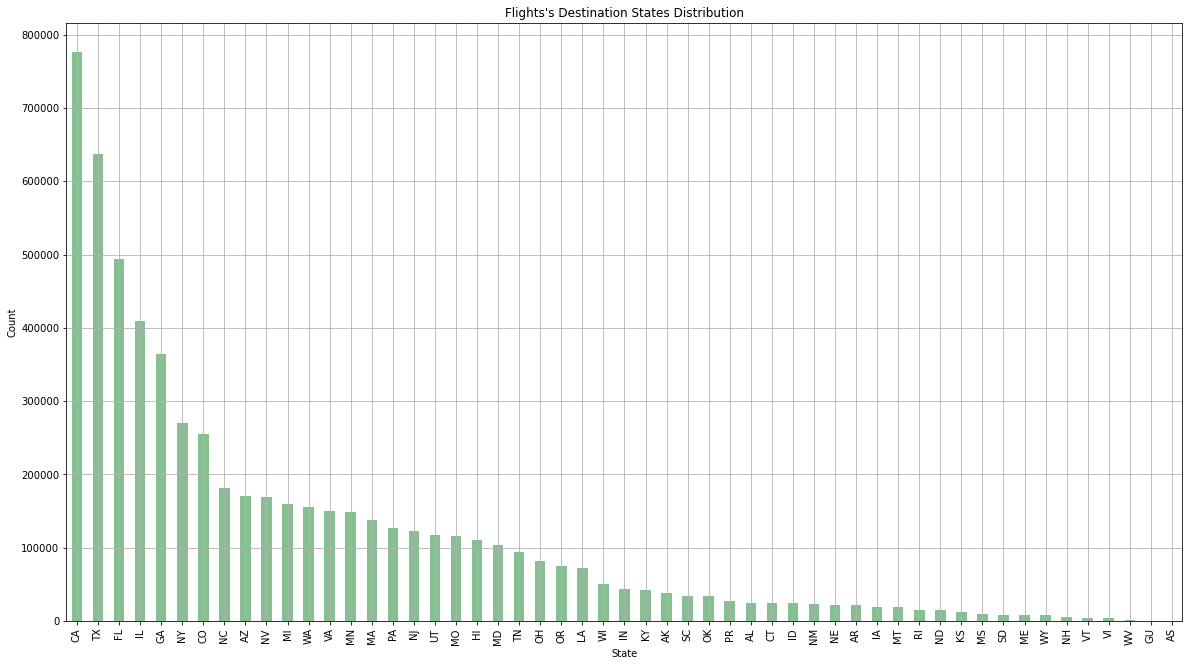

In [35]:
#Draw plot for airlines distribution
Dest_State_Plt=Dest_State_distribution.plot(kind='bar',title='Flights\'s Destination States Distribution',grid=True,color='#86bf91',figsize=(20,11));
Dest_State_Plt.set_xlabel("State");
Dest_State_Plt.set_ylabel("Count");

As we can see here Destination Stats same as The Origin States and the difference was insignificant; CA State has the highest Flight Numbers during 2018, then TX, FL,IL, GA perspective, and the least amount of flights are AS, GU, WV.

### 4. Cancelled Flights
Now We will start to find out proportions of cancelled and arrived flights gemerally

In [36]:
#create New Column to set 1 to cancelled and 0 to Arrived
df_1['IS_CANCELLED'] = np.where(
    df_1['CANCELLED'] == 1.0, "Cancelled",  "Arrived") 

In [37]:
df_1['IS_CANCELLED'].value_counts()

Arrived      5962801
Cancelled      81545
Name: IS_CANCELLED, dtype: int64

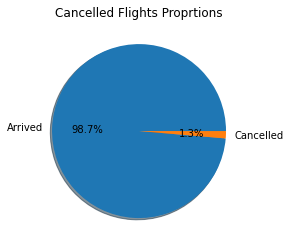

In [70]:
#plot pie chart
CancellPltedProprtionsPlt = plt.pie(df_1['IS_CANCELLED'].value_counts(), labels=['Arrived','Cancelled'], autopct='%1.1f%%', shadow=True)
plt.title("Cancelled Flights Proprtions")
plt.show()


### 5. Distribuation of Cancelled Airlines
then we will see dstribution of cancelled flights for each airlines

In [39]:
cancel_df = df_1.query("CANCELLED == 1.0")
cancel_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE,ORIGIN_CITY,ORIGIN_STATE,DEST_CITY,DEST_STATE,CANCELLATION_REASON,IS_CANCELLED
23,2018-01-04,UA,2429,EWR,DEN,1517,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
24,2018-01-04,UA,2041,EWR,DEN,1651,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
25,2018-01-04,UA,1819,EWR,DEN,600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
26,2018-01-04,UA,1740,EWR,DEN,1855,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
27,2018-01-04,UA,1262,EWR,DEN,1150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044292,2018-11-30,OO,5104,JMS,DVL,2314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled
6044310,2018-12-11,OO,5104,JMS,DVL,2314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled
6044312,2018-12-12,OO,5104,JMS,DVL,2314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled
6044336,2018-12-26,OO,5104,JMS,DVL,2315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled


In [40]:
cancel_distribution = cancel_df['AIRLINE'].value_counts()
cancel_distribution

Southwest Airlines Co.          18275
American Airlines Inc.          14945
American Eagle Airlines Inc.    10580
Skywest Airlines Inc.           10287
JetBlue Airways                  6419
Atlantic Southeast Airlines      5670
United Air Lines Inc.            4890
Delta Air Lines Inc.             3528
Frontier Airlines Inc.           2324
Alaska Airlines Inc.             2207
Spirit Air Lines                 1737
Virgin America                    433
Hawaiian Airlines Inc.            250
Name: AIRLINE, dtype: int64

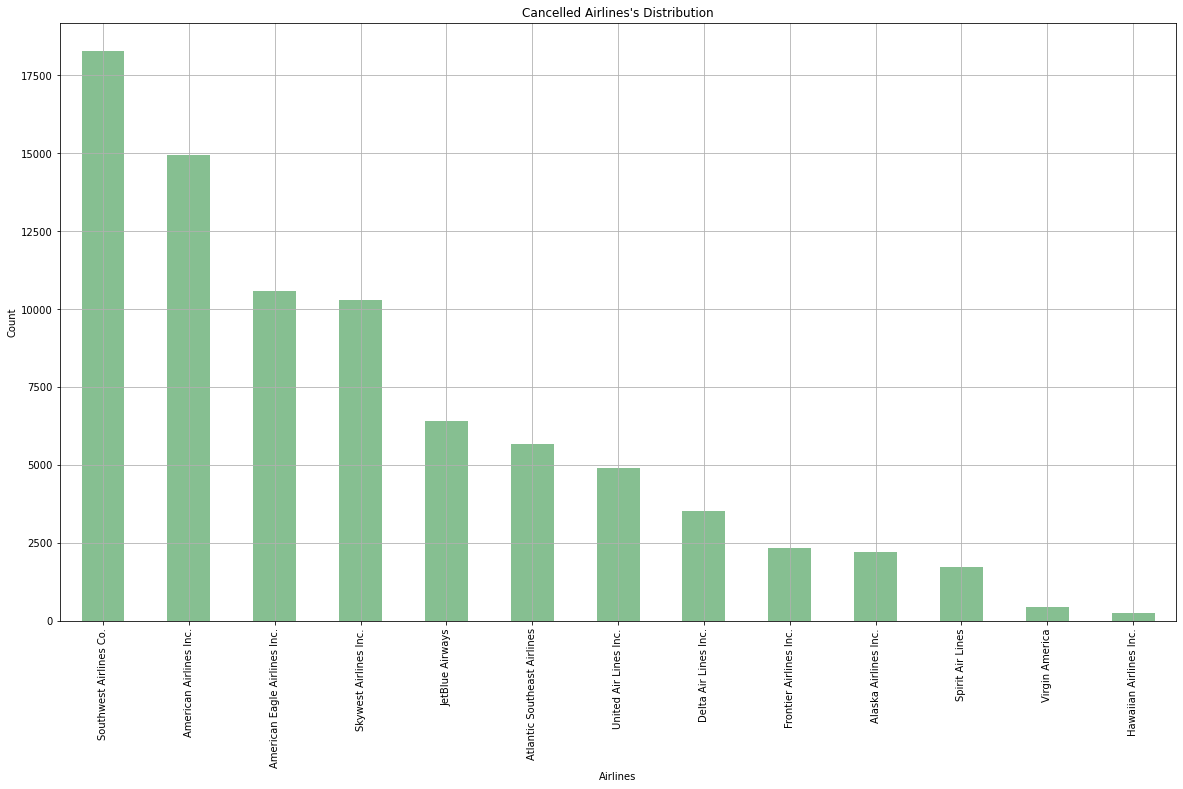

In [41]:
#Draw plot for airlines distribution
airlines_Plt=cancel_distribution.plot(kind='bar',title='Cancelled Airlines\'s Distribution',grid=True,color='#86bf91',figsize=(20,11));
airlines_Plt.set_xlabel("Airlines");
airlines_Plt.set_ylabel("Count");

We can notice that Southwest Airlines Co have highst number of Cancelled Flights on 2018 then American Airlines Inc, American Eagle Airlines Inc, and Skywest Airlines Inc airlines Respectively, and the least Airline's cancelled flights are Hawaiian Airlines Inc, then Virgin America.

<a id='Bivariate'></a>
## Bivariate Exploration
In this Section we will take a look af relationship between 2 variables like Cancelled Flights an months

### 1. Cancelled Flights Per Month

In [42]:
cancel_df = df_1.query("CANCELLED == 1.0")
cancel_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE,ORIGIN_CITY,ORIGIN_STATE,DEST_CITY,DEST_STATE,CANCELLATION_REASON,IS_CANCELLED
23,2018-01-04,UA,2429,EWR,DEN,1517,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
24,2018-01-04,UA,2041,EWR,DEN,1651,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
25,2018-01-04,UA,1819,EWR,DEN,600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
26,2018-01-04,UA,1740,EWR,DEN,1855,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
27,2018-01-04,UA,1262,EWR,DEN,1150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044292,2018-11-30,OO,5104,JMS,DVL,2314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled
6044310,2018-12-11,OO,5104,JMS,DVL,2314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled
6044312,2018-12-12,OO,5104,JMS,DVL,2314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled
6044336,2018-12-26,OO,5104,JMS,DVL,2315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled


In [43]:
# using groupby to get flight count of each Cancelled flight per month
Cancelled_Per_Month =cancel_df.groupby([ cancel_df['FL_DATE'].dt.strftime('%Y-%m')]).FL_DATE.count().reset_index(name='Flight_count')
Cancelled_Per_Month.head()

,FL_DATE,Flight_count
0,2018-01,12054
1,2018-02,7051
2,2018-03,11976
3,2018-04,4337
4,2018-05,5183


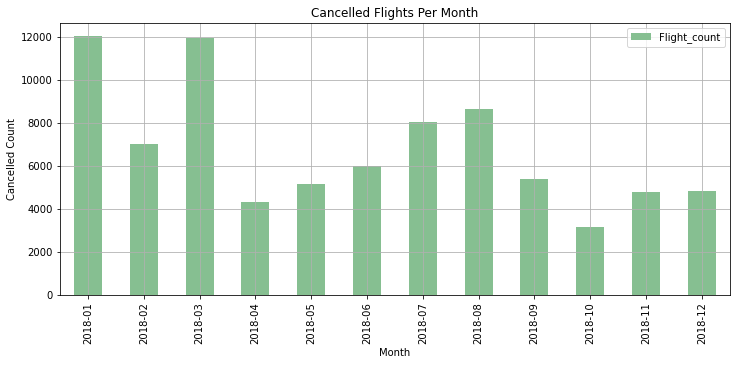

In [44]:
#Draw plot for Cancelled flights count per month
Cancelled_Per_Month_Plt=Cancelled_Per_Month.plot(kind='bar',title='Cancelled Flights Per Month', x='FL_DATE', y=['Flight_count'], grid=True,color=['#86bf91','#1e90ff'],figsize=(12, 5));
Cancelled_Per_Month_Plt.set_xlabel("Month");
Cancelled_Per_Month_Plt.set_ylabel("Cancelled Count");

As we can see January and March have highest Cancelled Flights in 2018 and least Cancelled flights occurred on October and April and it seems to Decrease at the end of the year compared with First months.

### 3.  Weather Cancelled Flights Per Month
I intersted on Weather Issues occurance over months and wivh month have the most weather issues

In [45]:
Weather_cancel_df = df_1.query("CANCELLATION_REASON == 'Weather'")
Weather_cancel_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE,ORIGIN_CITY,ORIGIN_STATE,DEST_CITY,DEST_STATE,CANCELLATION_REASON,IS_CANCELLED
23,2018-01-04,UA,2429,EWR,DEN,1517,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
24,2018-01-04,UA,2041,EWR,DEN,1651,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
25,2018-01-04,UA,1819,EWR,DEN,600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
26,2018-01-04,UA,1740,EWR,DEN,1855,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
27,2018-01-04,UA,1262,EWR,DEN,1150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,Weather,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044292,2018-11-30,OO,5104,JMS,DVL,2314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled
6044310,2018-12-11,OO,5104,JMS,DVL,2314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled
6044312,2018-12-12,OO,5104,JMS,DVL,2314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled
6044336,2018-12-26,OO,5104,JMS,DVL,2315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,Weather,Cancelled


In [46]:
# using groupby to get flight count of each Cancellation Reason per month
Weather_cancel_Per_Month =Weather_cancel_df.groupby([ df_1['FL_DATE'].dt.strftime('%Y-%m')]).FL_DATE.count().reset_index(name='Flight_count')
Weather_cancel_Per_Month

,FL_DATE,Flight_count
0,2018-01,9472
1,2018-02,4885
2,2018-03,9411
3,2018-04,1941
4,2018-05,2248
5,2018-06,2061
6,2018-07,2654
7,2018-08,2606
8,2018-09,2889
9,2018-10,1388


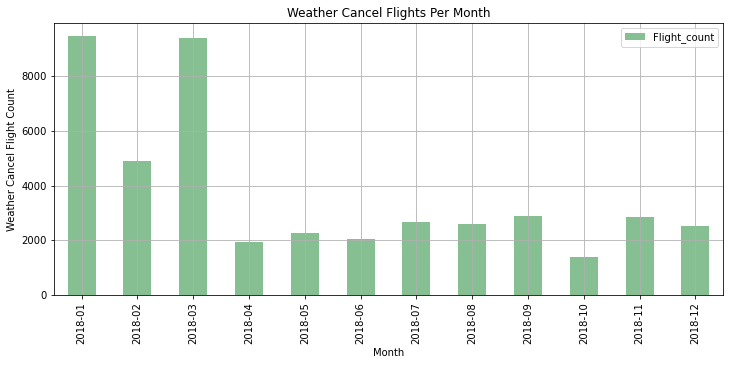

In [47]:
#Draw plot for Cancelled flights count per month
Weather_cancel_Per_Month_Plt=Weather_cancel_Per_Month.plot(kind='bar',title='Weather Cancel Flights Per Month', x='FL_DATE', y=['Flight_count'], grid=True,color=['#86bf91','#1e90ff'],figsize=(12, 5));
Weather_cancel_Per_Month_Plt.set_xlabel("Month");
Weather_cancel_Per_Month_Plt.set_ylabel("Weather Cancel Flight Count");

As we can see on the previous chart, January and March also have highest Cancelled Flights due to weather issues on 2018 and least Cancelled flights occurred on October and April.

### 4. Relation Between Departure Delay & Arrival Delay
Now we will look at other features like Departure Delay & Arrival Delay to see if any of them hold interesting properties.

In [48]:
Arrived_df = df_1.query('CANCELLED==0')
Arrived_df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE,ORIGIN_CITY,ORIGIN_STATE,DEST_CITY,DEST_STATE,CANCELLATION_REASON,IS_CANCELLED
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,NaN,Arrived
1,2018-01-01,UA,2041,EWR,DEN,1657,1938.0,161.0,14.0,1952.0,...,0.0,0.0,116.0,United Air Lines Inc.,Newark,NJ,Denver,CO,NaN,Arrived
2,2018-01-01,UA,1819,EWR,DEN,600,559.0,-1.0,14.0,613.0,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,NaN,Arrived
3,2018-01-01,UA,1740,EWR,DEN,1855,1906.0,11.0,26.0,1932.0,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,NaN,Arrived
4,2018-01-01,UA,1262,EWR,DEN,1150,1149.0,-1.0,13.0,1202.0,...,NaN,NaN,NaN,United Air Lines Inc.,Newark,NJ,Denver,CO,NaN,Arrived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044340,2018-12-28,OO,5104,JMS,DVL,2315,2328.0,13.0,14.0,2342.0,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,NaN,Arrived
6044341,2018-12-29,OO,5104,JMS,DVL,2315,2258.0,-17.0,20.0,2318.0,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,NaN,Arrived
6044342,2018-12-30,OO,5102,JMS,DVL,1310,1252.0,-18.0,14.0,1306.0,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,NaN,Arrived
6044343,2018-12-30,OO,5104,JMS,DVL,2315,2259.0,-16.0,44.0,2343.0,...,NaN,NaN,NaN,Skywest Airlines Inc.,Jamestown,ND,Devils Lake,ND,NaN,Arrived


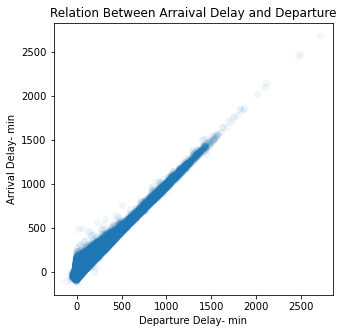

In [49]:
#plot the relationship using scatter with the transparency using alpha
plt.figure(figsize=(5,5))
plt.scatter(data=Arrived_df,
            x='DEP_DELAY',y='ARR_DELAY', alpha=1/20);
plt.title("Relation Between Arraival Delay and Departure")
plt.xlabel("Departure Delay- min")
plt.ylabel("Arrival Delay- min")
plt.show()

There are strong corellation between Arraival Delay and Departure, It's Linear relationship.

<a id='Multivariate'></a>
## Multivariate Exploration

In this section we will explore relation ship between 3 Factors,

### 1. The Most delayed Airlines 
Here I'll check most delayed Airlines and if it's same as Cancelles Airlines that we notice previously 

In [50]:
# using groupby to get DEP_DELAY, ARR_DELAY Avg for each airlines
Airlines_Delay =df_1.groupby(['AIRLINE']).agg({'DEP_DELAY': "mean", 'ARR_DELAY': "mean" })#.reset_index(name='favorites')
Airlines_Delay

,DEP_DELAY,ARR_DELAY
AIRLINE,,
Alaska Airlines Inc.,2.481820,-0.501562
American Airlines Inc.,10.078218,5.432065
American Eagle Airlines Inc.,7.777683,5.383186
Atlantic Southeast Airlines,12.319338,8.800700
Delta Air Lines Inc.,7.461923,-0.289825
Frontier Airlines Inc.,19.687457,14.210678
Hawaiian Airlines Inc.,0.913099,0.851310
JetBlue Airways,15.869267,11.432516
Skywest Airlines Inc.,10.097457,7.022981


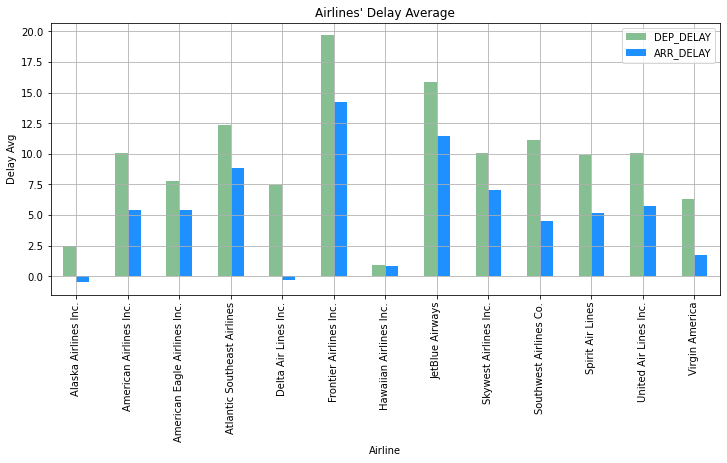

In [51]:
#Draw plot for Airlines Delay (Dep, Arraival)
Airlines_Delay_Plt=Airlines_Delay.plot(kind='bar',title='Airlines\' Delay Average', y=['DEP_DELAY','ARR_DELAY'], grid=True,color=['#86bf91','#1e90ff'],figsize=(12, 5));
Airlines_Delay_Plt.set_xlabel("Airline");
Airlines_Delay_Plt.set_ylabel("Delay Avg");

The worste airline for departures and Arrival is Frontier Airlines Inc, then JetBlue Airways
and Alaska Airlines Inc was the best for arrivals.

### 2.  highst Canellation Reasons Per Month
I want to see which cancellation issue is most occurance, I expect that weather Issues will be the most occurrence

In [52]:
# using groupby to get flight count of each Cancellation Reason per month
Cancelled_Reason_Per_Month =df_1.groupby([ df_1['FL_DATE'].dt.strftime('%Y-%m'),'CANCELLATION_REASON']).AIRLINE.count().reset_index(name='Flight_count')
Cancelled_Reason_Per_Month.head()

,FL_DATE,CANCELLATION_REASON,Flight_count
0,2018-01,Carrier,1425
1,2018-01,NAS,1156
2,2018-01,Security,1
3,2018-01,Weather,9472
4,2018-02,Carrier,1108


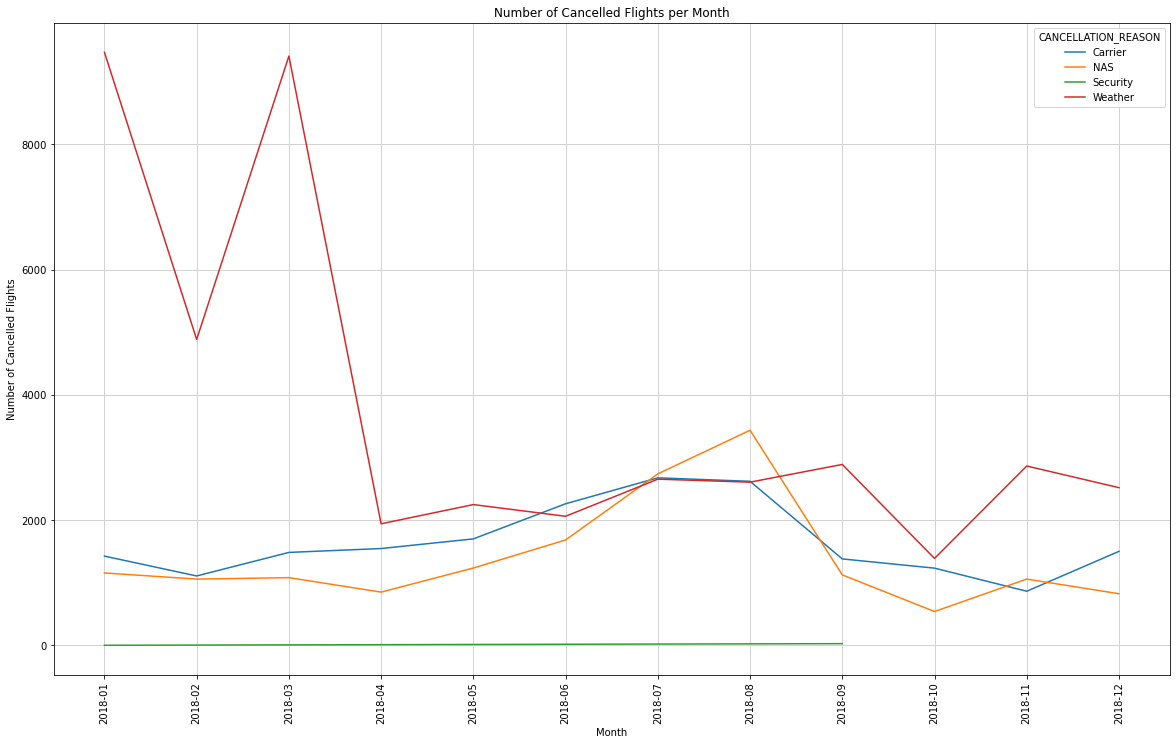

In [53]:
#plot multiple lines for Cancellation Reason
plt.figure(figsize=(20,12))
ax=sns.lineplot(data=Cancelled_Reason_Per_Month, x='FL_DATE', y='Flight_count', hue='CANCELLATION_REASON')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
# plot data
plt.xticks(rotation=90)
plt.title("Number of Cancelled Flights per Month")
plt.xlabel("Month")
plt.ylabel("Number of Cancelled Flights")
plt.show()


As we expected Weather Issues are the highest Cancellation situation especially in January and March, and in the other months all other Cancellation Issues seems to be approximately the same 

### 3. Highst Delay Type Average Time Per Month

In [54]:
# using groupby to get flight count of Carrier Delay Reason per month
Carrier_df =df_1.query('CARRIER_DELAY > 0')
Carrier_Per_Month =Carrier_df.groupby([ df['FL_DATE'].dt.strftime('%Y-%m')]).CARRIER_DELAY.mean().reset_index(name='Delay_Avg')
Carrier_Per_Month['DELAY_TYPE']='Carrier Delay'
Carrier_Per_Month.head()

,FL_DATE,Delay_Avg,DELAY_TYPE
0,2018-01,40.394583,Carrier Delay
1,2018-02,40.492653,Carrier Delay
2,2018-03,45.281500,Carrier Delay
3,2018-04,37.254462,Carrier Delay
4,2018-05,38.194480,Carrier Delay


In [55]:
# using groupby to get flight count of Weather Delay Reason per month
Weather_df =df_1.query('WEATHER_DELAY > 0')
Weather_Per_Month =Weather_df.groupby([ df['FL_DATE'].dt.strftime('%Y-%m')]).WEATHER_DELAY.mean().reset_index(name='Delay_Avg')
Weather_Per_Month['DELAY_TYPE']='Weather Delay'
Weather_Per_Month.head()

,FL_DATE,Delay_Avg,DELAY_TYPE
0,2018-01,53.817865,Weather Delay
1,2018-02,56.268602,Weather Delay
2,2018-03,64.836636,Weather Delay
3,2018-04,51.653557,Weather Delay
4,2018-05,53.042460,Weather Delay


In [56]:
# using groupby to get flight count of NAS Delay Reason per month
NAS_df =df_1.query('NAS_DELAY > 0')
NAS_Per_Month =NAS_df.groupby([ df['FL_DATE'].dt.strftime('%Y-%m')]).NAS_DELAY.mean().reset_index(name='Delay_Avg')
NAS_Per_Month['DELAY_TYPE']='NAS Delay'
NAS_Per_Month.head()

,FL_DATE,Delay_Avg,DELAY_TYPE
0,2018-01,26.413248,NAS Delay
1,2018-02,25.144255,NAS Delay
2,2018-03,39.628216,NAS Delay
3,2018-04,28.336669,NAS Delay
4,2018-05,26.150365,NAS Delay


In [57]:
# using groupby to get flight count of Security Delay Reason per month
Security_df =df_1.query('SECURITY_DELAY > 0')
Security_Per_Month =Security_df.groupby([ df['FL_DATE'].dt.strftime('%Y-%m')]).SECURITY_DELAY.mean().reset_index(name='Delay_Avg')
Security_Per_Month['DELAY_TYPE']='Security Delay'
Security_Per_Month.head()

,FL_DATE,Delay_Avg,DELAY_TYPE
0,2018-01,30.630189,Security Delay
1,2018-02,27.163333,Security Delay
2,2018-03,32.035019,Security Delay
3,2018-04,30.934389,Security Delay
4,2018-05,23.637717,Security Delay


In [58]:
# using groupby to get flight count of LATE_AIRCRAFT Delay Reason per month
Late_Aircraft_df =df_1.query('LATE_AIRCRAFT_DELAY > 0')
Late_Aircraft_Per_Month =Late_Aircraft_df.groupby([ df['FL_DATE'].dt.strftime('%Y-%m')]).LATE_AIRCRAFT_DELAY.mean().reset_index(name='Delay_Avg')
Late_Aircraft_Per_Month['DELAY_TYPE']='Late Aircraft Delay'
Late_Aircraft_Per_Month.head()

,FL_DATE,Delay_Avg,DELAY_TYPE
0,2018-01,48.468944,Late Aircraft Delay
1,2018-02,50.349612,Late Aircraft Delay
2,2018-03,54.063526,Late Aircraft Delay
3,2018-04,50.845015,Late Aircraft Delay
4,2018-05,49.300008,Late Aircraft Delay


In [59]:
#Concat rows
Delay_Avg_Per_Month = pd.concat([Carrier_Per_Month, Weather_Per_Month], ignore_index=True)
Delay_Avg_Per_Month.head(20)

,FL_DATE,Delay_Avg,DELAY_TYPE
0,2018-01,40.394583,Carrier Delay
1,2018-02,40.492653,Carrier Delay
2,2018-03,45.281500,Carrier Delay
3,2018-04,37.254462,Carrier Delay
4,2018-05,38.194480,Carrier Delay
5,2018-06,33.391836,Carrier Delay
6,2018-07,44.083784,Carrier Delay
7,2018-08,33.276044,Carrier Delay
8,2018-09,34.681375,Carrier Delay
9,2018-10,45.660992,Carrier Delay


In [60]:
Delay_Avg_Per_Month = pd.concat([Delay_Avg_Per_Month, NAS_Per_Month], ignore_index=True)
Delay_Avg_Per_Month

,FL_DATE,Delay_Avg,DELAY_TYPE
0,2018-01,40.394583,Carrier Delay
1,2018-02,40.492653,Carrier Delay
2,2018-03,45.281500,Carrier Delay
3,2018-04,37.254462,Carrier Delay
4,2018-05,38.194480,Carrier Delay
5,2018-06,33.391836,Carrier Delay
6,2018-07,44.083784,Carrier Delay
7,2018-08,33.276044,Carrier Delay
8,2018-09,34.681375,Carrier Delay
9,2018-10,45.660992,Carrier Delay


In [61]:
Delay_Avg_Per_Month = pd.concat([Delay_Avg_Per_Month, Security_Per_Month], ignore_index=True)
Delay_Avg_Per_Month

,FL_DATE,Delay_Avg,DELAY_TYPE
0,2018-01,40.394583,Carrier Delay
1,2018-02,40.492653,Carrier Delay
2,2018-03,45.281500,Carrier Delay
3,2018-04,37.254462,Carrier Delay
4,2018-05,38.194480,Carrier Delay
5,2018-06,33.391836,Carrier Delay
6,2018-07,44.083784,Carrier Delay
7,2018-08,33.276044,Carrier Delay
8,2018-09,34.681375,Carrier Delay
9,2018-10,45.660992,Carrier Delay


In [62]:
Delay_Avg_Per_Month = pd.concat([Delay_Avg_Per_Month, Late_Aircraft_Per_Month], ignore_index=True)
Delay_Avg_Per_Month

,FL_DATE,Delay_Avg,DELAY_TYPE
0,2018-01,40.394583,Carrier Delay
1,2018-02,40.492653,Carrier Delay
2,2018-03,45.281500,Carrier Delay
3,2018-04,37.254462,Carrier Delay
4,2018-05,38.194480,Carrier Delay
5,2018-06,33.391836,Carrier Delay
6,2018-07,44.083784,Carrier Delay
7,2018-08,33.276044,Carrier Delay
8,2018-09,34.681375,Carrier Delay
9,2018-10,45.660992,Carrier Delay


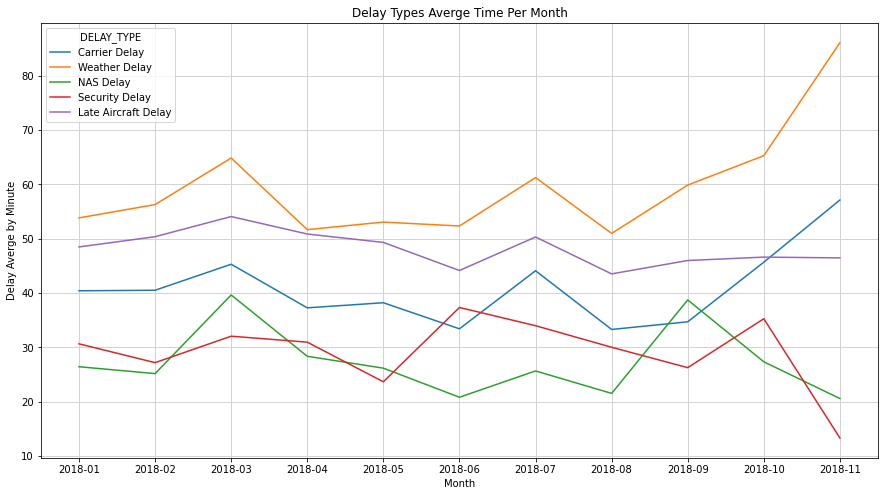

In [63]:
#plot multiple lines
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=Delay_Avg_Per_Month, x='FL_DATE', y='Delay_Avg', hue='DELAY_TYPE')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
# plot data
plt.title("Delay Types Averge Time Per Month")
plt.xlabel("Month")
plt.ylabel("Delay Averge by Minute")
plt.show()

We can notice here Weather Issues cuazed delay more than other issues and it's increased significantly at the end of the year, then Late aircraft Issues while Security Issues and NAS Issues have least Average Time and decreasing at the end of the year.
so we conclude that Weather Issues are most effective factor whether in Cancellation or delays situations as I ecpected.